In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_wine = pd.read_csv('drive//My Drive//knight//Data//train.csv')

In [3]:
df_wine.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
df_wine.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


Very interesting distribuition of Points and Price.

We can see that the values of points are distributed between 80 and 100

The price have a high difference between the values and a high standard deviation

In prices, the IQR (Interquantil Range) is 25. The max value is 3300;

In [5]:
print("Shape of dataset:",df_wine.shape)
print("List of columns in dataset: " ,df_wine.columns)

Shape of dataset: (82657, 12)
List of columns in dataset:  Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')


In [0]:
#unique values in columns
col = ['country' , 'review_title','review_description',	'designation'	,'province',	'region_1'	,'region_2',	'winery',	'variety']
for c in col:
  print(c)
  print(df_wine[c].unique())
  print(df_wine[c].nunique())
  print('#########')

country
['Australia' 'US' 'Italy' 'France' 'Argentina' 'New Zealand' 'Austria'
 'Chile' 'Portugal' 'Germany' 'Spain' nan 'Israel' 'England' 'Brazil'
 'South Africa' 'Romania' 'Slovenia' 'Greece' 'Canada' 'Turkey' 'Lebanon'
 'Mexico' 'Uruguay' 'Bulgaria' 'Hungary' 'Moldova' 'Morocco' 'Georgia'
 'Ukraine' 'Croatia' 'Peru' 'Switzerland' 'Luxembourg' 'Cyprus'
 'Czech Republic' 'Macedonia' 'Serbia' 'India']
38
#########
review_title
['Andrew Peace 2007 Peace Family Vineyard Chardonnay (South Eastern Australia)'
 'North by Northwest 2014 Red (Columbia Valley (WA))'
 'Renato Ratti 2007 Conca  (Barolo)' ...
 'Vivác Winery 2008 Single Vineyard Cabernet Sauvignon (New Mexico)'
 'Domaine de la Madone 2014 Nouveau  (Beaujolais-Villages)'
 'Round Pond 2010 Estate Cabernet Sauvignon (Rutherford)']
76983
#########
review_description
['Classic Chardonnay aromas of apple, pear and hay lead into a palate marked by decent intensity but also a bit of sweetness. Orange and candy notes run through the rathe

**shows 13786 individual winerys in dataset with 28 unique variety of wine ie 28 classes for prediction. There are 38 countries in the dataset**!
 

**PLOTTING**

Text(0, 0.5, 'Count')

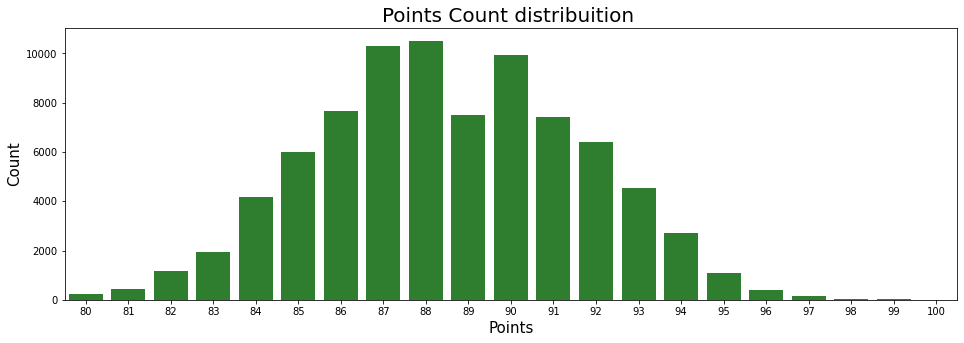

In [6]:
plt.figure(figsize=(16,5))
g = sns.countplot(x='points', data=df_wine, color='forestgreen') # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

We can clearly see the distribuitioon of the data. It seems very similar with a normal distribution.

Just a few number of wines have less than 82 points and more than 95 points.

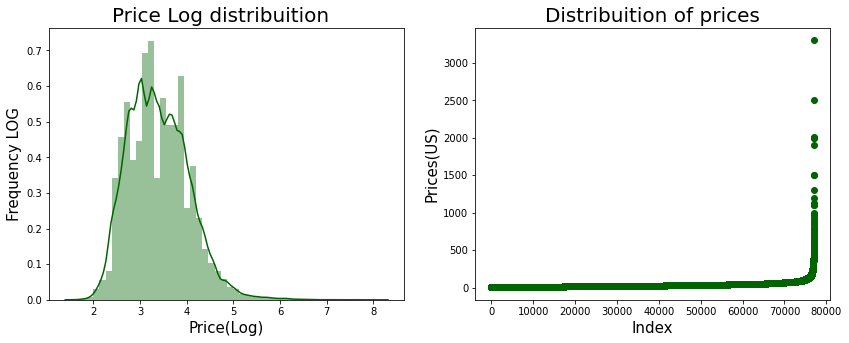

In [7]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(df_wine['price'].dropna() + 1),
                  color='darkgreen')
g1.set_title("Price Log distribuition  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(df_wine.shape[0]), np.sort(df_wine.price.values), 
            color='darkgreen')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)


plt.show()

 The Price Log give us an impression that the data could normaly distributed

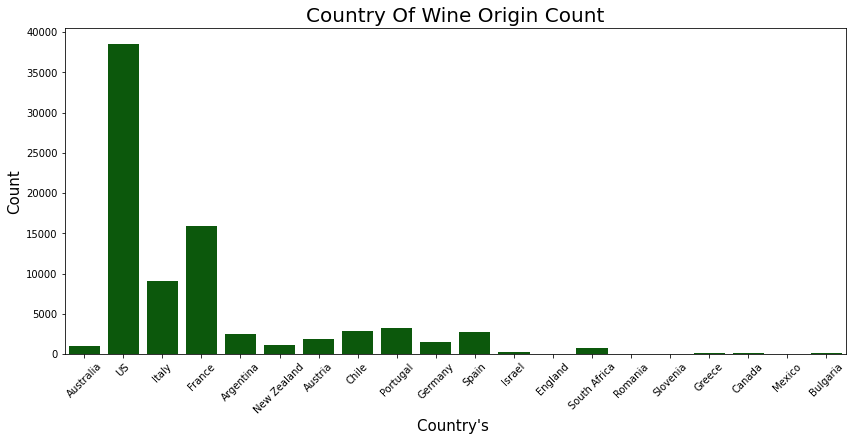

In [8]:
plt.figure(figsize=(14,6))

country = df_wine.country.value_counts()[:20]

g = sns.countplot(x='country', 
                  data=df_wine[df_wine.country.isin(country.index.values)],
                 color='darkgreen')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

Yikes!! I ought to see more european countries at top like Itlay in production of Wines , but US has the lead!

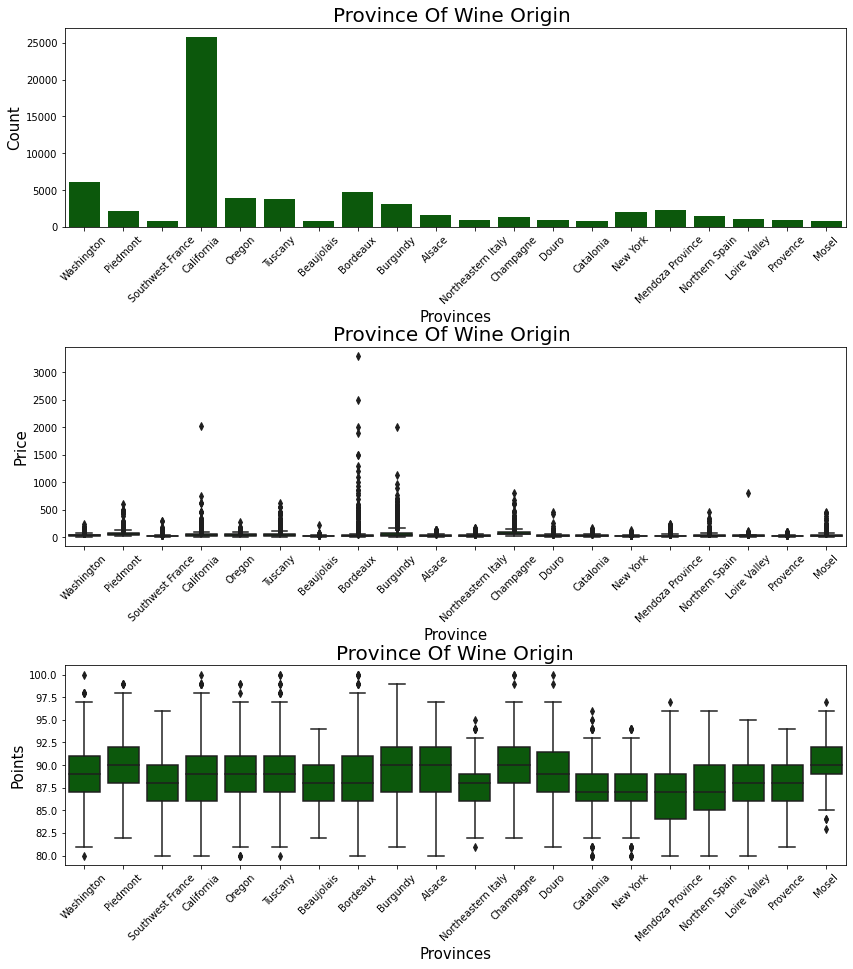

In [9]:
plt.figure(figsize=(14,15))

provinces = df_wine['province'].value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='province', 
                  data=df_wine.loc[(df_wine.province.isin(provinces.index.values))], 
                  color='darkgreen')
g.set_title("Province Of Wine Origin ", fontsize=20)
g.set_xlabel("Provinces", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price', x='province',
                  data=df_wine.loc[(df_wine.province.isin(provinces.index.values))], 
                  color='darkgreen')
g1.set_title("Province Of Wine Origin ", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='province',
                  data=df_wine.loc[(df_wine.province.isin(provinces.index.values))], 
                  color='darkgreen')
g2.set_title("Province Of Wine Origin", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

largest production of wine happens in california,USA strange!! 
 
 price of wine from Bordeaux is high maybe quality over quantity.